2.1.0


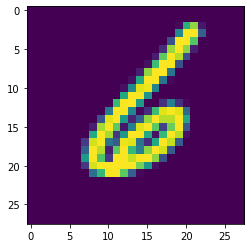

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

print(tf.__version__)

# stop training when accuracy reaches 0.94
# this function runs in the end of every epoch
# and decides that it should continue the training or not
ACCURACY_THRESHOLD = 0.94
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if(tf.math.greater(logs["accuracy"],ACCURACY_THRESHOLD)):
            print("\nReached %2.2f%% accuracy, so stopping training!!" %(logs["accuracy"]*100))
            self.model.stop_training = True

#load dataset
(training_images, training_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

#normalize dataset
training_images = training_images/255.0
test_images = test_images/255.0

# show 999th image
plt.imshow(training_images[999])
plt.show()

# default shape
train_sh = training_images.shape
test_sh = test_images.shape

# reshape images
# we use conv2D layers in our model so we need to add an other dimension
# conv2D accepts 4 dims
training_images = training_images.reshape(list(training_images.shape) + [1]) 
test_images = test_images.reshape(list(test_images.shape) + [1]) 

In [2]:
model = tf.keras.models.Sequential([
        # conv layer with 6 filters and 4*4 kernel size
        tf.keras.layers.Conv2D(12,4,activation='relu',input_shape=training_images.shape[1:]),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Conv2D(6,3,activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        # this layers flattens the data
        # in other words converts it to a vector
        tf.keras.layers.Flatten(),
        # a fully connected layer with 64 neurons
        tf.keras.layers.Dense(64, activation=tf.nn.relu),
        # 10 neurons in output layer because we have 10 classes
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 12)        204       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 12)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 6)         654       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 6)           0         
_________________________________________________________________
flatten (Flatten)            (None, 150)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                9664      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

In [3]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(training_images, training_labels,batch_size=64, epochs=3 ,callbacks=[myCallback()])

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 22s 372us/sample - loss: 0.3448 - accuracy: 0.8939
Epoch 2/3
59968/60000 [============================>.] - ETA: 0s - loss: 0.0986 - accuracy: 0.9697
Reached 96.97% accuracy, so stopping training!!
60000/60000 [==============================] - 22s 361us/sample - loss: 0.0986 - accuracy: 0.9697


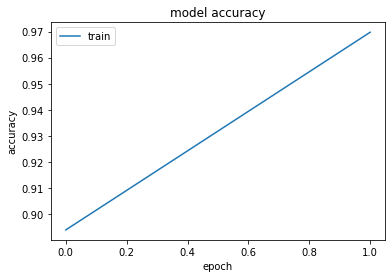

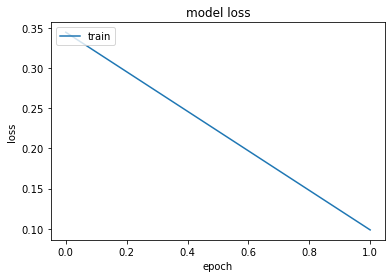

In [4]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [5]:
result = model.evaluate(test_images, test_labels)
print("accuracy on test data: ",result[1])

10000/10000 [==============================] - 3s 296us/sample - loss: 0.0731 - accuracy: 0.9763
accuracy on test data:  0.9763


In [6]:
predictions = model.predict(test_images)

In [7]:
training_image = training_images.reshape(train_sh)
test_images = test_images.reshape(test_sh)


some predictions by model :



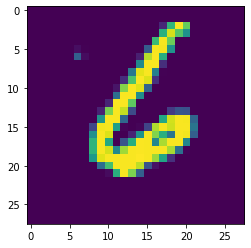

model's prediction :  6


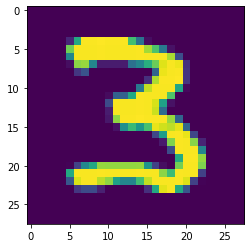

model's prediction :  3


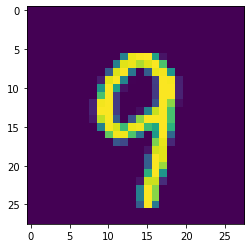

model's prediction :  9


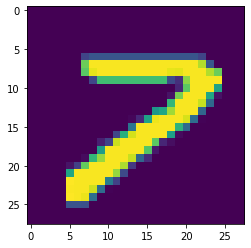

model's prediction :  7


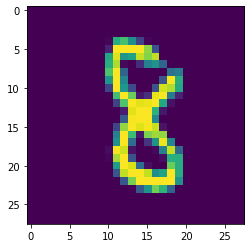

model's prediction :  8


In [11]:
print("\nsome predictions by model :\n")
for i in range(5):
    index = np.random.randint(0,len(test_images))
    plt.imshow(test_images[index])
    plt.show()
    print("model's prediction : ",np.argmax(predictions[index]))